In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime
import pandas as pd
import random
import numpy as np


In [9]:
train_data = pd.read_csv('~/Development/kaggle/rossman/data/train.csv')
test_data = pd.read_csv('~/Development/kaggle/rossman/data/test.csv')
store_data = pd.read_csv('~/Development/kaggle/rossman/data/store.csv')

This will split up the dataframe into multiple dev, train, and test sets

In [10]:
sample_rows = random.sample(train_data.index, len(train_data)/20)
mini_train_data = train_data.ix[sample_rows[:len(sample_rows)/2]]
dev_data = train_data.ix[sample_rows[len(sample_rows)/2 : len(sample_rows)]]
train_data = train_data.drop(sample_rows)


**Exploratory Analysis**


In [11]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [12]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


In [13]:
dev_joined_data = pd.merge(dev_data, store_data, on='Store')

In [14]:
dev_joined_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
25425,620,3,2014-04-02,8505,720,1,1,0,0,d,c,5440,NaN,NaN,1,40,2014,"Jan,Apr,Jul,Oct"
25426,620,3,2013-12-18,10646,850,1,1,0,0,d,c,5440,NaN,NaN,1,40,2014,"Jan,Apr,Jul,Oct"
25427,620,6,2014-05-17,8904,808,1,0,0,0,d,c,5440,NaN,NaN,1,40,2014,"Jan,Apr,Jul,Oct"
25428,620,3,2014-01-08,8371,758,1,1,0,0,d,c,5440,NaN,NaN,1,40,2014,"Jan,Apr,Jul,Oct"
25429,620,7,2015-03-08,0,0,0,0,0,0,d,c,5440,NaN,NaN,1,40,2014,"Jan,Apr,Jul,Oct"


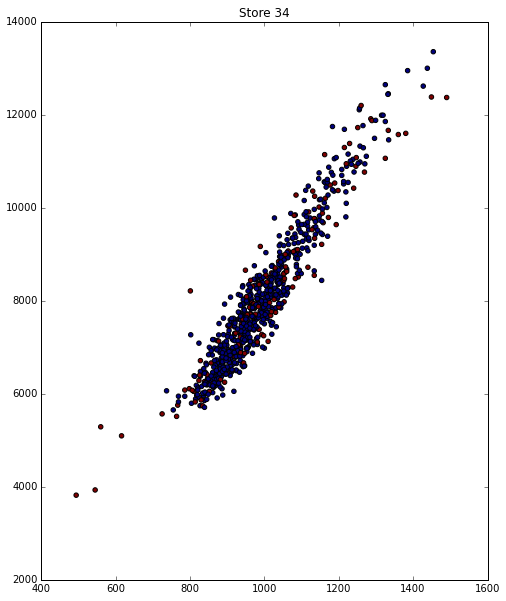

In [15]:
store = 34
plt.figure(figsize=(8,10))
store_df = train_data.loc[train_data['Store'] == store]
plot_df = store_df[store_df['Sales'] > 500]
colors = plot_df.SchoolHoliday
plt.title("Store {0}".format(store))
plt.scatter(plot_df.Customers, plot_df.Sales, c=colors)

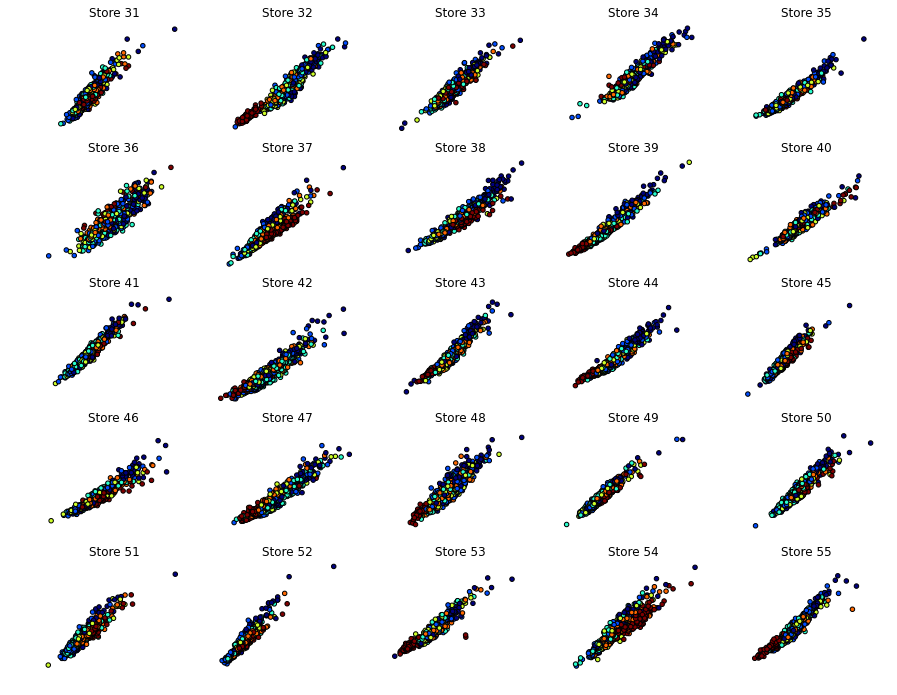

In [16]:
ts = train_data.sort(columns='Date')

plt.figure(figsize=(15,60))
num_plots = 25
starting_store = 31
for i in range(0, num_plots):
    ts1 = ts.loc[ts['Store'] == i + starting_store]
    plot_df = ts1[ts1['Sales'] > 500]
    colors = plot_df.DayOfWeek
    plt.subplot(num_plots, 5, i + 1)
    plt.axis('off')
    plt.title('Store {0}'.format(starting_store + i))
    plt.scatter(plot_df.Customers, plot_df.Sales, c=colors)
plt.show()

###Starting Simple with one store###
Try splitting out the data for a particular store into a separate data frame and let's start with that.

In [17]:
# Pick a random store
store = random.choice(train_data['Store'].tolist())
print store

440


In [18]:
# join the data for this store with the store_data dataframe on the Store column
store_df = pd.merge(train_data[train_data['Store'] == store], store_data, on='Store')
store_df['Date']=pd.to_datetime(store_df['Date']).astype(datetime)
store_df['StateHoliday']=store_df['StateHoliday'].astype(str)
store_df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

Take a look at sales by other variables for this store

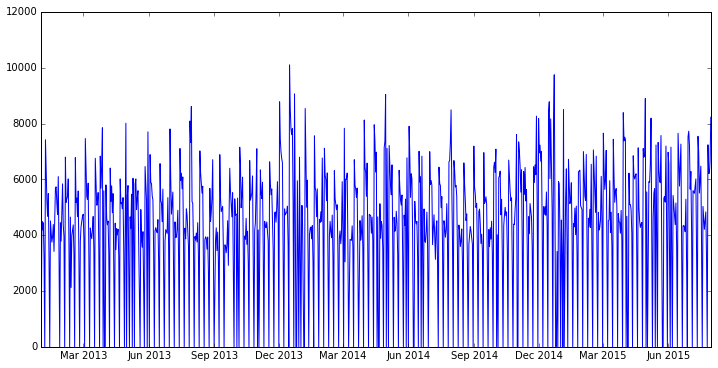

In [19]:
colors = store_df.DayOfWeek
plt.figure(figsize=(12,6))
#plt.subplot(num_plots, 5, i + 1)
#plt.axis('off')
#plt.title('Store {0}'.format(starting_store + i))
plt.plot(store_df.Date, store_df.Sales)


In [20]:
# split the store dataframe into a dev set, a mini training set, a training set, and a test_set
sample_rows = random.sample(store_df.index, len(store_df)/20)
store_mini_train_df = store_df.ix[sample_rows[:len(sample_rows)/2]]
store_dev_df = store_df.ix[sample_rows[len(sample_rows)/2 : len(sample_rows)]]
store_df = store_df.drop(sample_rows)

In [21]:
store_df = store_df[store_df['Sales'] > 500]

In [22]:
# this is a nifty little module that transforms pandas dataframes to numpy arrays
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model

# DayofWeek = numeric, 1-7
# Open, [0,1] = [closed,open]
# Promo, [0,1] = [no promo, promo]
# StateHoliday, [a,b,c,0] = [public holiday, easter holiday, xmas holiday, none]
# SchoolHoliday, [0,1] = [no effect, effect]
# Customers, numeric

data_mapper = DataFrameMapper([
        ('DayOfWeek', None),
        ('Open', None),
        ('Promo', None),
        ('StateHoliday', sklearn.preprocessing.LabelBinarizer()),
        ('SchoolHoliday', None),
        ('Customers', None)       
    ])

label_mapper = DataFrameMapper([
        ('Sales', None)
    ])

#print store_df['DayOfWeek'].tolist() not in [1,2,3,4,5,6,7]
X_t = data_mapper.fit_transform(store_df.copy())
Y_t = label_mapper.fit_transform(store_df.copy())

X_dev = data_mapper.fit_transform(store_dev_df.copy())
Y_dev = label_mapper.fit_transform(store_dev_df.copy())

In [23]:
clf = sklearn.linear_model.LinearRegression()
clf.fit(X_t, Y_t)
print ('Coefficients: \n', clf.coef_)
print ('Residual sum of squares: %.2f' % np.mean((clf.predict(X_dev) - Y_dev) **2))
print ('variance score: %.2f' % clf.score(X_dev, Y_dev))

('Coefficients: \n', array([[  5.43886167e+01,  -8.28735405e-13,   5.30473905e+02,
         -1.26096299e-13,   6.70406698e+01,   1.01689067e+01]]))
Residual sum of squares: 396753.77
variance score: 0.92


Looking at the different columns and trying to fit a simple linear model indicates that there are some bad data points skewing the data or making it difficult to do computations. Need to determine what those data issues are and clean them up
For example, in the above simple linear regression on single store data, there are stores for which I'm unable to include anything other than sales ~ customers.

It turns out that it's important to make sure that the objects in the pandas dataframe have the right dtype assigned. I forced assignment, above, and I should probably do it when the data is read from disk.

Let's take a look at KNN

In [65]:
mini_train_joined_data = pd.merge(mini_train_data, store_data, on='Store')
dev_joined_data = pd.merge(dev_data, store_data, on='Store')

tjd = pd.merge(train_data, store_data, on='Store')

Im not sure what to do about the NaN columns in this table; it's a result of the join...

In [66]:
data_mapper = DataFrameMapper([
        ('DayOfWeek', sklearn.preprocessing.LabelBinarizer()),
        ('Open', None),
        ('Promo', None),
#        ('StateHoliday', sklearn.preprocessing.LabelBinarizer()),
#        ('SchoolHoliday', None),
        ('Customers', None)       
    ])

label_mapper = DataFrameMapper([
        ('Sales', None)
    ])

X_t = data_mapper.fit_transform(tjd.copy())
Y_t = np.ravel(label_mapper.fit_transform(tjd.copy()))

X_dev = data_mapper.fit_transform(dev_joined_data.copy())
Y_dev = np.ravel(label_mapper.fit_transform(dev_joined_data.copy()))


In [67]:
from sklearn.neighbors import KNeighborsClassifier


In [69]:
neighbors = 5
knn = KNeighborsClassifier(neighbors)
knn.fit(X_t, Y_t)
accuracy = knn.score(X_dev, Y_dev)
print 'Accuracy = %.4f' %(accuracy)

Accuracy = 0.1685


The joined data sets don't seem to work all that well. Let's try just the plain data set without the added store info.

In [70]:
data_mapper = DataFrameMapper([
        ('DayOfWeek', sklearn.preprocessing.LabelBinarizer()),
        ('Open', None),
        ('Promo', None),
#        ('StateHoliday', sklearn.preprocessing.LabelBinarizer()),
#        ('SchoolHoliday', None),
        ('Customers', None)       
    ])

label_mapper = DataFrameMapper([
        ('Sales', None)
    ])

X_t = data_mapper.fit_transform(mini_train_data.copy())
Y_t = np.ravel(label_mapper.fit_transform(mini_train_data.copy()))

X_dev = data_mapper.fit_transform(dev_data.copy())
Y_dev = np.ravel(label_mapper.fit_transform(dev_data.copy()))

In [71]:
neighbors = 5
knn = KNeighborsClassifier(neighbors)
knn.fit(X_t, Y_t)
accuracy = knn.score(X_dev, Y_dev)
print 'Accuracy = %.4f' %(accuracy)

Accuracy = 0.1685


So K-NN isn't doint that well on the mini training data set. Let's try decision trees...


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data_mapper = DataFrameMapper([
        ('DayOfWeek', sklearn.preprocessing.LabelBinarizer()),
        ('Open', None),
        ('Promo', None),
#        ('StateHoliday', sklearn.preprocessing.LabelBinarizer()),
#        ('SchoolHoliday', None),
        ('Customers', None)       
    ])

label_mapper = DataFrameMapper([
        ('Sales', None)
    ])

X_t = data_mapper.fit_transform(mini_train_data.copy())
Y_t = np.ravel(label_mapper.fit_transform(mini_train_data.copy()))

X_dev = data_mapper.fit_transform(dev_data.copy())
Y_dev = np.ravel(label_mapper.fit_transform(dev_data.copy()))